# 1. Ablaufplanung von Prozessen in Betriebssystemen
Implementieren Sie die Algorithmen aus Aufgabe 1 in Python. Ihnen steht folgendes Interface zur Verfügung:
Gegeben ist eine Basisklasse namens `Scheduler`. Diese kann genutzt werden, um eine Liste von Task-Objekten dynamisch zu planen.
Dafür muss der Methode `Scheduler.schedule` eine Liste solcher Task-Objekte übergeben werden.

Das eigentliche Verhalten von `Scheduler` kann mithilfe der Methode `Scheduler.update` implementiert werden.
Indem Sie von `Scheduler` erben, können Sie diese Methode überschreiben und um ihren eigenen Code ergänzen.
Auf diese Weise haben sie Zugriff auf interne Variablen von `Scheduler`.
Für Sie interessant sind vor allem:
+ `self.current_task`: der aktuelle Task (wurde im vorherigen Zeitpunkt bearbeitet, `None` im Idle-Fall). Muss immer in `self.tasks_active` enthalten sein.
+ `self.tasks_active`: Liste mit allen Tasks, die ausführbereit sind. Diese Liste wird automatisch mit der verbleibenden Zeit aller Tasks aktualisiert. Das `duration` Feld eines Tasks entspricht hier also der verbleibenden Zeit.
Wenn in einem Zeitpunkt die Ankunftszeit von Tasks erreicht wurde, dann werden diese "neuen" Tasks im Parameter `new_tasks` übergeben.

Um die Funktionsweise zu verdeutlichen, ist im Folgenden ein Algorithmus implementiert, der einen zufälligen Task zur Ausführung auswählt, sobald der vorherige abgeschlossen wurde.

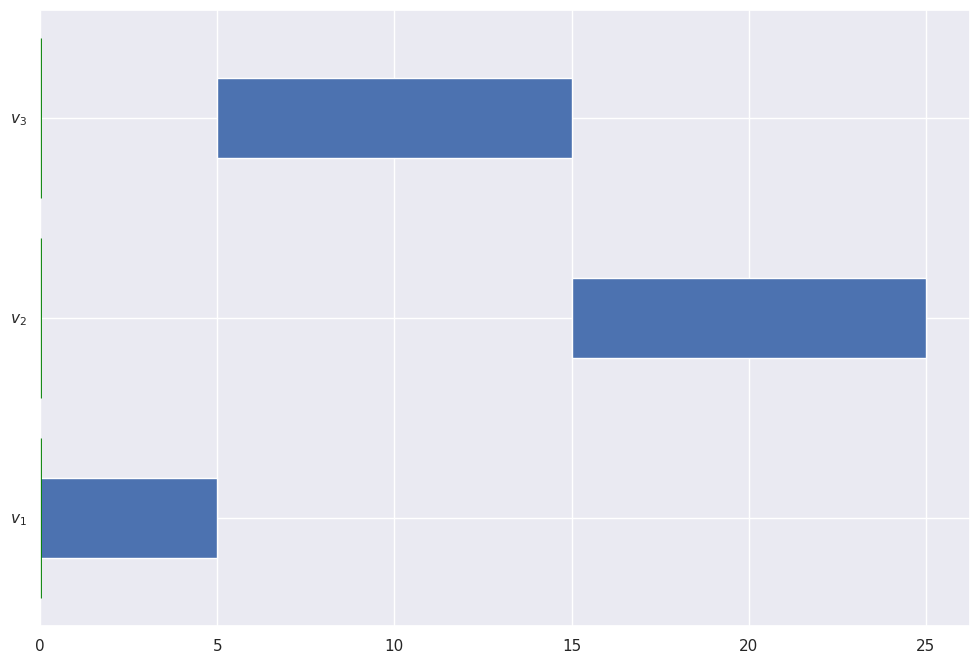

In [1]:
from scheduler.scheduler import *
import random


class Random(Scheduler):
    def update(self, new_tasks):
        if len(new_tasks) != 0:
            self.tasks_active += new_tasks

        if len(self.tasks_active) > 0 and self.current_task == None:
            # pick a number from 0 to #of available tasks
            task_id = random.randrange(len(self.tasks_active))
            self.current_task = self.tasks_active[task_id]


# Plane ein paar Beispielstasks
example_tasks = [
    Task(id=1, duration=5, release=0),
    Task(id=2, duration=10, release=0),
    Task(id=3, duration=10, release=0),
]

scheduler = Random()
random_schedule = scheduler.schedule(example_tasks)
random_schedule.gantt_chart()

## 1.1
Nutzen Sie nun das vorherige Beispiel, um die anderen Algorithmen zu implementieren.
In der folgenden Codezelle ist die Liste an Tasks aus Aufgabe 1 definiert, sodass sie ihre Ergebnisse vergleichen können.

Round Robin lassen wir hier aus.

In [2]:
task_list = [
    Task(id=1, duration=20, release=0, priority=2),
    Task(id=2, duration=5, release=0, priority=1),
    Task(id=3, duration=10, release=5, priority=4),
    Task(id=4, duration=5, release=20, priority=3),
    Task(id=5, duration=20, release=50, priority=6),
    Task(id=6, duration=5, release=50, priority=7),
]

### First Come First Served

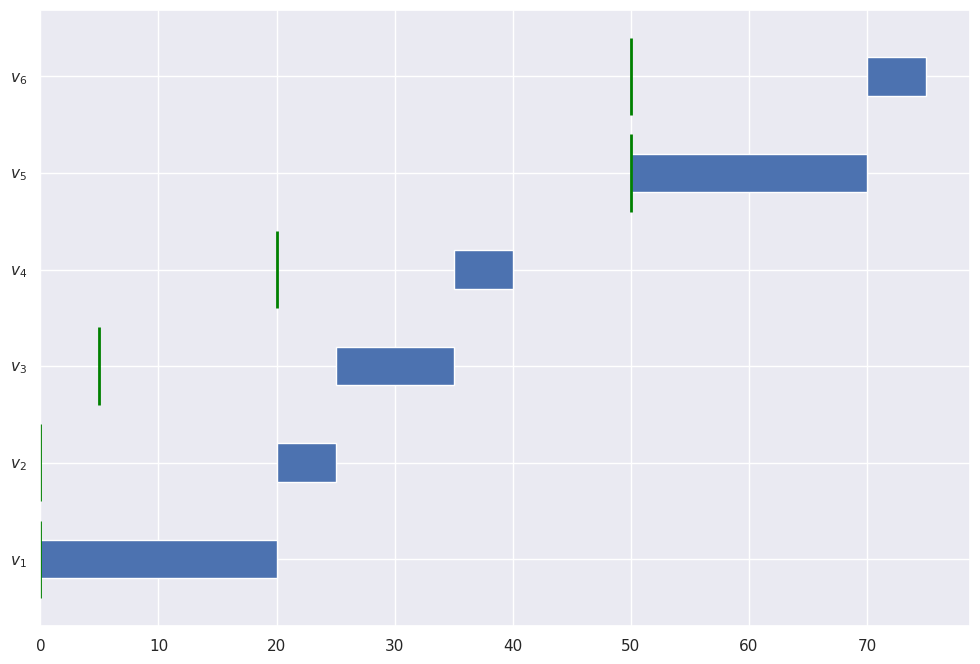

In [3]:
class FCFS(Scheduler):
    def update(self, new_tasks):
        # new tasks arrived
        if len(new_tasks) != 0:
            self.tasks_active += new_tasks

        if self.current_task is None and len(self.tasks_active) > 0:
            self.current_task = self.tasks_active[0]


scheduler = FCFS()
fcfs_schedule = scheduler.schedule(task_list)
fcfs_schedule.gantt_chart()

### Shortest Job First

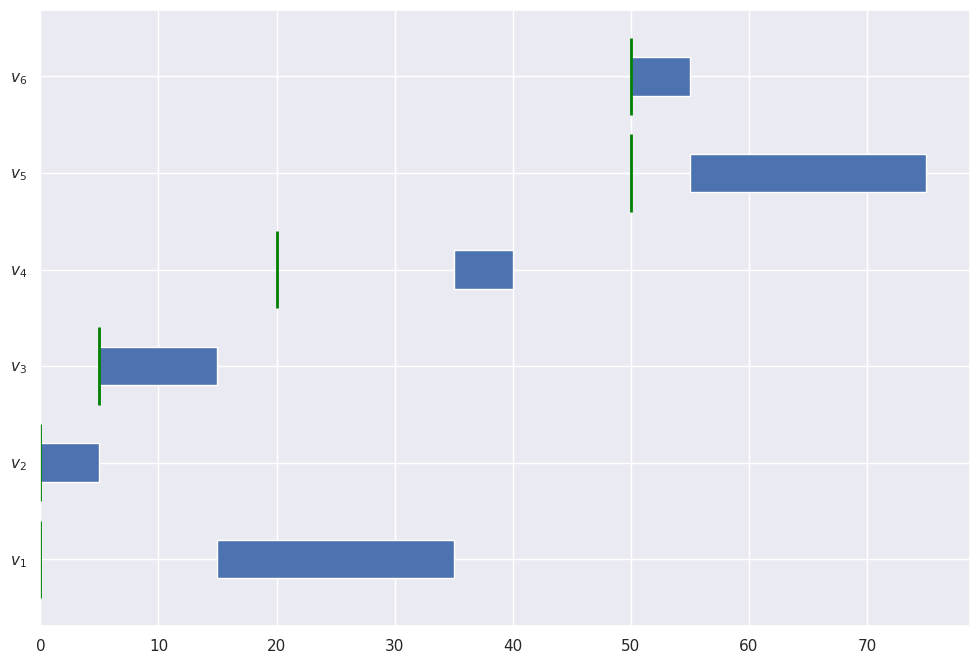

In [4]:
class SJF(Scheduler):
    def update(self, new_tasks):
        # some tasks are new, just append them
        if len(new_tasks) != 0:
            self.tasks_active += new_tasks
            self.tasks_active.sort(key=lambda task: task.duration)

        if self.current_task is None and len(self.tasks_active) > 0:
            self.current_task = self.tasks_active[0]


scheduler = SJF()
sjf_schedule = scheduler.schedule(task_list)
sjf_schedule.gantt_chart()

### Shortest Remaining Time Next

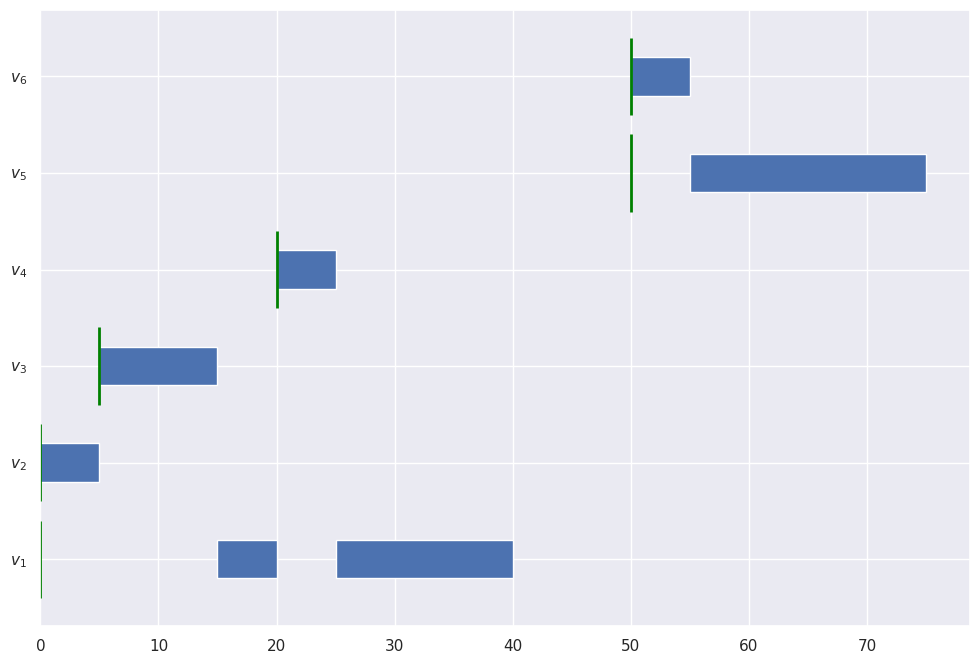

In [5]:
class SRTN(Scheduler):
    def update(self, new_tasks) -> Task:
        # some tasks are new, just append them
        if len(new_tasks) != 0:
            self.tasks_active += new_tasks
            self.tasks_active.sort(key=lambda task: task.duration)

        if len(self.tasks_active) > 0:
            self.current_task = self.tasks_active[0]

scheduler = SRTN()
srtn_schedule = scheduler.schedule(task_list)
srtn_schedule.gantt_chart()


### Prioritätsscheduling

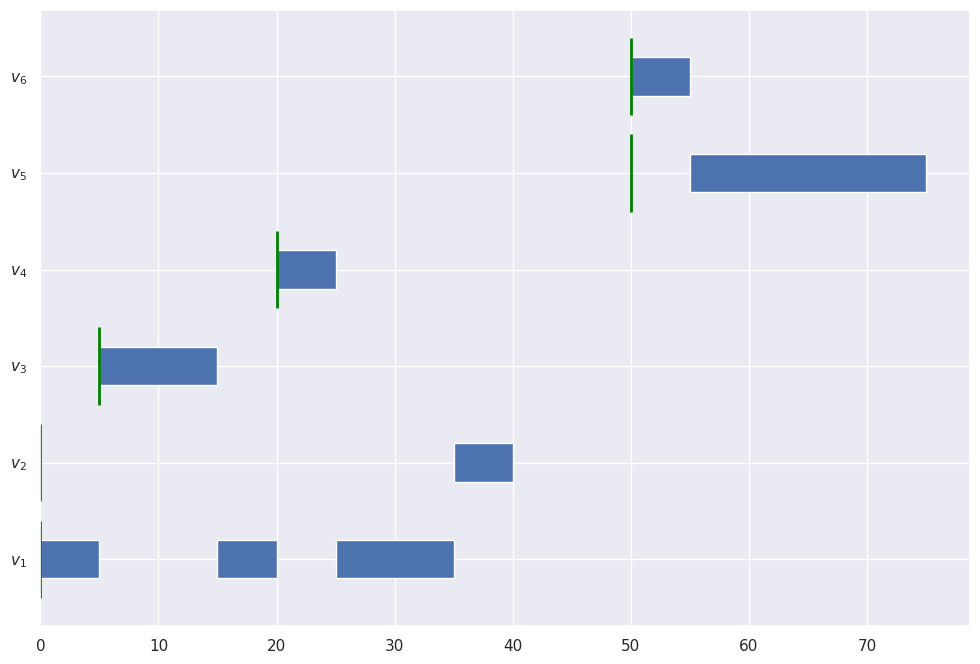

In [6]:
class Priority(Scheduler):
    def update(self, new_tasks):
        if len(new_tasks) != 0:
            self.tasks_active += new_tasks
            self.tasks_active.sort(key=lambda task: -task.priority)

        if len(self.tasks_active) > 0:
            self.current_task = self.tasks_active[0]


scheduler = Priority()
prio_schedule = scheduler.schedule(task_list)
prio_schedule.gantt_chart()

## Zusatz: 1.2

Berechnen sie mithilfe des `schedule` Objekts die Latenz und die CPU-Auslastung der berechneten Ablaufpläne.

In [7]:
# TODO :)

AttributeError: 'Schedule' object has no attribute 'values'

# Aufgabe 2: EDF (nichtperiodische Ablaufplanung)

Implementieren Sie den EDF-Algorithmus nach dem aus Aufgabe 1 bekannten Schema.

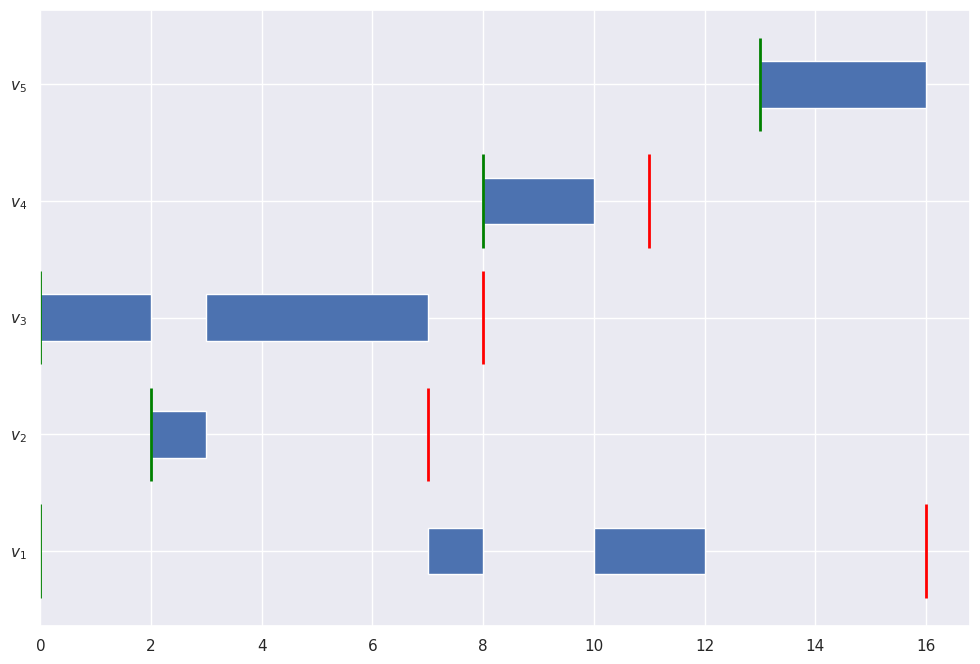

In [8]:
edf_task_list = [
    Task(id=1, duration=3, release=0, deadline=16),
    Task(id=2, duration=1, release=2, deadline=7),
    Task(id=3, duration=6, release=0, deadline=8),
    Task(id=4, duration=2, release=8, deadline=11),
    Task(id=5, duration=3, release=13, deadline=18),
]


class EDF(Scheduler):
    def update(self, new_tasks):
        if len(new_tasks) != 0:
            self.tasks_active += new_tasks

        if len(self.tasks_active) > 0:
            self.tasks_active.sort(key= lambda t: t.deadline)
            self.current_task = self.tasks_active[0]


scheduler = EDF()
schedule = scheduler.schedule(edf_task_list)
schedule.gantt_chart()